# BTC ETF Approval Analysis

## Introduction

### The approval of a Bitcoin (BTC) Exchange-Traded Fund (ETF) marks a significant milestone, blending traditional finance with the digital asset world. This post-event analysis aims to evaluate the impact of the BTC ETF approval on Bitcoin's price, volatility, and trading volumes. Through examining data before and after the event, we seek to uncover the immediate and extended effects on the market. Our investigation employs statistical analysis and visualization to highlight market responses, offering valuable insights for investors, analysts, and cryptocurrency enthusiasts about the influence of major regulatory events on the crypto ecosystem.

In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import datetime
import time
import os
from pandas_datareader import data as pdr
import numpy as np
import plotly.graph_objects as go
from scipy import stats


## Data Collection

In [2]:
#Loading BTC price data from yahoo finance
start_date = '2023-01-01'
end_date = datetime.date.today()
df = yf.download('BTC-USD', start_date, end_date )
df = df.reset_index()

#rename the column created from the index and filter dates with no volume
df.rename(columns={'index': 'date'}, inplace=True)
df=df[df['Volume']!=0]
df

/home/dgebnico/anaconda3/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-01,16547.914062,16630.439453,16521.234375,16625.080078,16625.080078,9244361700
1,2023-01-02,16625.509766,16759.343750,16572.228516,16688.470703,16688.470703,12097775227
2,2023-01-03,16688.847656,16760.447266,16622.371094,16679.857422,16679.857422,13903079207
3,2023-01-04,16680.205078,16964.585938,16667.763672,16863.238281,16863.238281,18421743322
4,2023-01-05,16863.472656,16884.021484,16790.283203,16836.736328,16836.736328,13692758566
...,...,...,...,...,...,...,...
396,2024-02-01,42569.761719,43243.167969,41879.191406,43075.773438,43075.773438,21423953779
397,2024-02-02,43077.640625,43422.488281,42584.335938,43185.859375,43185.859375,18603843039
398,2024-02-03,43184.964844,43359.941406,42890.808594,42992.250000,42992.250000,11169245236
399,2024-02-04,42994.941406,43097.644531,42374.832031,42583.582031,42583.582031,14802225490


## Data Manipulation

In [3]:
def volatility_indicator(df, column, window):
    
    #Calculate daily returns
    df['Daily Returns'] = df['Adj Close'].pct_change()

    # Calculate the rolling volatility using a window of 30 days for the daily returns
    df[column] = df['Daily Returns'].rolling(window=window).std() * (365 ** 0.5)
    return df


In [4]:
df = volatility_indicator(df, '30_Day_Volatility', 30)
df = volatility_indicator(df, '7_Day_Volatility', 7)
df

,Date,Open,High,Low,Close,Adj Close,Volume,Daily Returns,30_Day_Volatility,7_Day_Volatility
0,2023-01-01,16547.914062,16630.439453,16521.234375,16625.080078,16625.080078,9244361700,NaN,NaN,NaN
1,2023-01-02,16625.509766,16759.343750,16572.228516,16688.470703,16688.470703,12097775227,0.003813,NaN,NaN
2,2023-01-03,16688.847656,16760.447266,16622.371094,16679.857422,16679.857422,13903079207,-0.000516,NaN,NaN
3,2023-01-04,16680.205078,16964.585938,16667.763672,16863.238281,16863.238281,18421743322,0.010994,NaN,NaN
4,2023-01-05,16863.472656,16884.021484,16790.283203,16836.736328,16836.736328,13692758566,-0.001572,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
396,2024-02-01,42569.761719,43243.167969,41879.191406,43075.773438,43075.773438,21423953779,0.011581,0.532856,0.396208
397,2024-02-02,43077.640625,43422.488281,42584.335938,43185.859375,43185.859375,18603843039,0.002556,0.506533,0.254626
398,2024-02-03,43184.964844,43359.941406,42890.808594,42992.250000,42992.250000,11169245236,-0.004483,0.494651,0.261448
399,2024-02-04,42994.941406,43097.644531,42374.832031,42583.582031,42583.582031,14802225490,-0.009506,0.495628,0.275439


In [5]:
#creating dataframes for pre and post etf approval analysis
df['Date'] = pd.to_datetime(df['Date'])
etf_approval_date = pd.to_datetime('2024-01-10')
three_week_pre = (etf_approval_date - pd.Timedelta(days=21), etf_approval_date)
three_week_post = (etf_approval_date, etf_approval_date + pd.Timedelta(days=21))
print(three_week_post)
week_pre = (etf_approval_date - pd.Timedelta(days=7), etf_approval_date)
week_post = (etf_approval_date, etf_approval_date + pd.Timedelta(days=7))
three_week_pre_etf_df = df[(df['Date'] > three_week_pre[0]) & (df['Date'] <= three_week_pre[1])]
three_week_post_etf_df = df[(df['Date'] > three_week_post[0]) & (df['Date'] <= three_week_post[1])]
week_pre_etf_df = df[(df['Date'] > week_pre[0]) & (df['Date'] <= week_pre[1])]
week_post_etf_df = df[(df['Date'] > week_post[0]) & (df['Date'] <= week_post[1])]

(Timestamp('2024-01-10 00:00:00'), Timestamp('2024-01-31 00:00:00'))


In [6]:
three_week_pre_etf_df

,Date,Open,High,Low,Close,Adj Close,Volume,Daily Returns,30_Day_Volatility,7_Day_Volatility
354,2023-12-21,43648.125000,44240.667969,43330.050781,43869.152344,43869.152344,22452766169,0.004969,0.446120,0.438154
355,2023-12-22,43868.988281,44367.957031,43441.968750,43997.902344,43997.902344,21028503216,0.002935,0.424469,0.368486
356,2023-12-23,44012.199219,44015.699219,43351.355469,43739.542969,43739.542969,13507796558,-0.005872,0.425107,0.380022
357,2023-12-24,43728.367188,43945.523438,42786.917969,43016.117188,43016.117188,18830554085,-0.016539,0.431379,0.363517
358,2023-12-25,43010.574219,43765.093750,42765.769531,43613.140625,43613.140625,21115795370,0.013879,0.432457,0.311033
359,2023-12-26,43599.847656,43603.175781,41676.488281,42520.402344,42520.402344,30026850982,-0.025055,0.442745,0.367757
360,2023-12-27,42518.468750,43683.160156,42167.582031,43442.855469,43442.855469,25260941032,0.021694,0.445030,0.314904
361,2023-12-28,43468.199219,43804.781250,42318.550781,42627.855469,42627.855469,22992093014,-0.018760,0.451247,0.335461
362,2023-12-29,42614.644531,43124.324219,41424.062500,42099.402344,42099.402344,26000021055,-0.012397,0.454847,0.334559
363,2023-12-30,42091.753906,42584.125000,41556.226562,42156.902344,42156.902344,16013925945,0.001366,0.454103,0.338978


In [7]:
three_week_post_etf_df

,Date,Open,High,Low,Close,Adj Close,Volume,Daily Returns,30_Day_Volatility,7_Day_Volatility
375,2024-01-11,46656.074219,48969.371094,45678.644531,46368.585938,46368.585938,45833734549,-0.005559,0.459916,0.543129
376,2024-01-12,46354.792969,46498.136719,41903.769531,42853.167969,42853.167969,43332698900,-0.075815,0.524147,0.813558
377,2024-01-13,42799.445312,43234.660156,42464.144531,42842.382812,42842.382812,20601860469,-0.000252,0.524054,0.813876
378,2024-01-14,42842.261719,43065.597656,41724.613281,41796.269531,41796.269531,17521429522,-0.024418,0.523440,0.827868
379,2024-01-15,41715.066406,43319.722656,41705.417969,42511.968750,42511.968750,22320220558,0.017124,0.526201,0.592748
380,2024-01-16,42499.335938,43566.273438,42085.996094,43154.945312,43154.945312,24062872740,0.015125,0.522777,0.625815
381,2024-01-17,43132.101562,43189.890625,42189.308594,42742.652344,42742.652344,20851232595,-0.009554,0.513717,0.603944
382,2024-01-18,42742.312500,42876.347656,40631.171875,41262.058594,41262.058594,25218357242,-0.034640,0.527397,0.621599
383,2024-01-19,41278.460938,42134.160156,40297.457031,41618.406250,41618.406250,25752407154,0.008636,0.514910,0.379880
384,2024-01-20,41624.589844,41877.894531,41446.824219,41665.585938,41665.585938,11586690904,0.001134,0.514502,0.380841


In [8]:
week_pre_etf_df

,Date,Open,High,Low,Close,Adj Close,Volume,Daily Returns,30_Day_Volatility,7_Day_Volatility
368,2024-01-04,42855.816406,44770.023438,42675.175781,44179.921875,44179.921875,30448091210,0.031081,0.450470,0.576508
369,2024-01-05,44192.980469,44353.285156,42784.718750,44162.691406,44162.691406,32336029347,-0.000390,0.449575,0.560102
370,2024-01-06,44178.953125,44227.632812,43475.156250,43989.195312,43989.195312,16092503468,-0.003929,0.448158,0.564759
371,2024-01-07,43998.464844,44495.570312,43662.230469,43943.097656,43943.097656,19330573863,-0.001048,0.442683,0.566880
372,2024-01-08,43948.707031,47218.000000,43244.082031,46970.503906,46970.503906,42746192015,0.068894,0.501660,0.681619
373,2024-01-09,46987.640625,47893.699219,45244.714844,46139.730469,46139.730469,39821290992,-0.017687,0.506681,0.702638
374,2024-01-10,46121.539062,47647.222656,44483.152344,46627.777344,46627.777344,50114613298,0.010578,0.458621,0.554815


In [9]:
week_post_etf_df

,Date,Open,High,Low,Close,Adj Close,Volume,Daily Returns,30_Day_Volatility,7_Day_Volatility
375,2024-01-11,46656.074219,48969.371094,45678.644531,46368.585938,46368.585938,45833734549,-0.005559,0.459916,0.543129
376,2024-01-12,46354.792969,46498.136719,41903.769531,42853.167969,42853.167969,43332698900,-0.075815,0.524147,0.813558
377,2024-01-13,42799.445312,43234.660156,42464.144531,42842.382812,42842.382812,20601860469,-0.000252,0.524054,0.813876
378,2024-01-14,42842.261719,43065.597656,41724.613281,41796.269531,41796.269531,17521429522,-0.024418,0.523440,0.827868
379,2024-01-15,41715.066406,43319.722656,41705.417969,42511.968750,42511.968750,22320220558,0.017124,0.526201,0.592748
380,2024-01-16,42499.335938,43566.273438,42085.996094,43154.945312,43154.945312,24062872740,0.015125,0.522777,0.625815
381,2024-01-17,43132.101562,43189.890625,42189.308594,42742.652344,42742.652344,20851232595,-0.009554,0.513717,0.603944


## Data Analysis

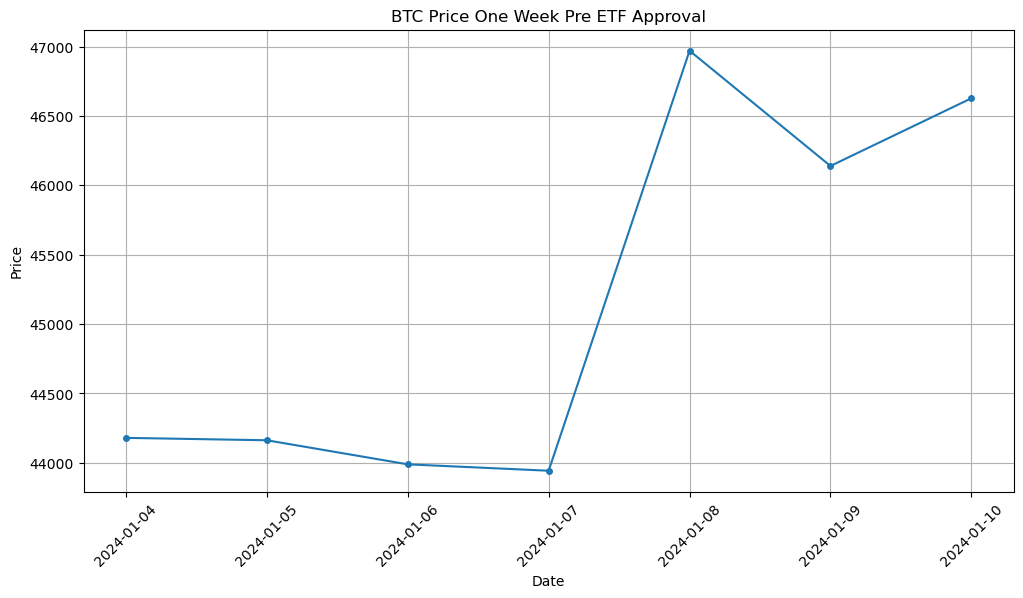

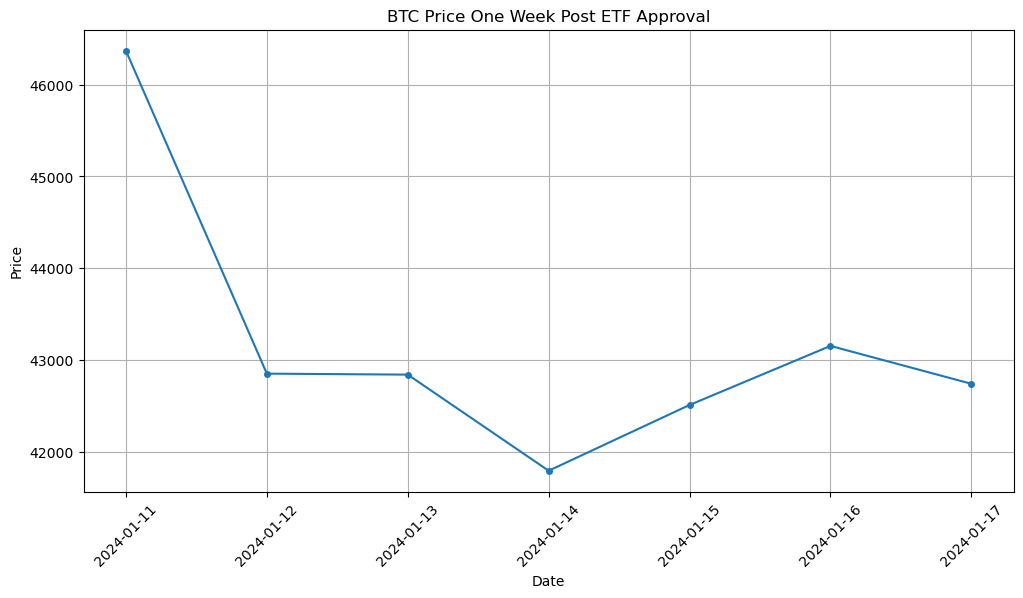

In [10]:
# Function to plot time series data
def plot_time_series(df, column, title, ylabel):
    plt.figure(figsize=(12, 6))
    plt.plot(df['Date'], df[column], marker='o', linestyle='-', markersize=4)
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)
    plt.grid(True)

# Plotting Price time series pre and post ETF approval
plot_time_series(week_pre_etf_df, 'Adj Close', 'BTC Price One Week Pre ETF Approval', 'Price')
plot_time_series(week_post_etf_df, 'Adj Close', 'BTC Price One Week Post ETF Approval', 'Price')




plt.show()


### Insight: The week before the ETF approval we can see a clear uptrend in BTC price as the price was spiking closer to the approval date. However, post approval we see the complete opposite as we see a steep reversal in price. 


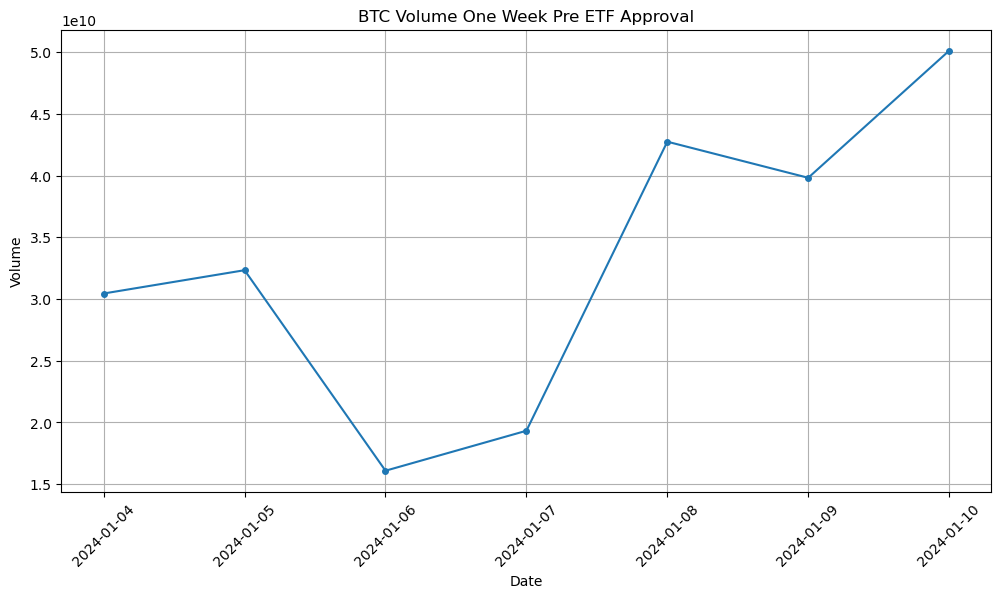

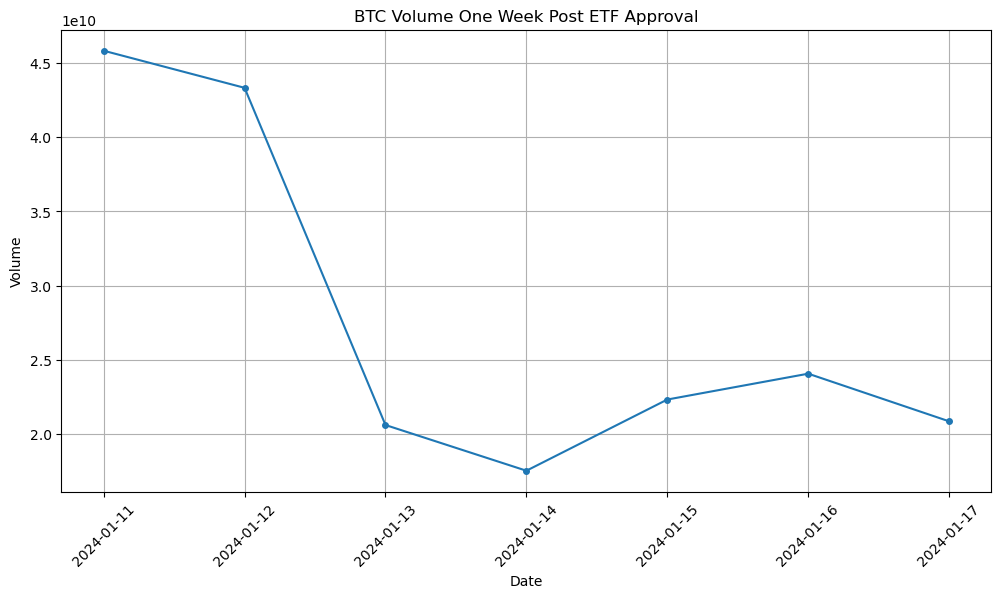

In [11]:
# Plotting Volume time series pre and post ETF approval
plot_time_series(week_pre_etf_df, 'Volume', 'BTC Volume One Week Pre ETF Approval', 'Volume')
plot_time_series(week_post_etf_df, 'Volume', 'BTC Volume One Week Post ETF Approval', 'Volume')
plt.show()

### Insight: The week pre approval of the BTC ETF volume appeared to be rising steadily indicating a lot activity from market participants as anticipation for the ETF grew larger and larger. However, we see a steep drop in volume potentially indicating that many market participants lost interest in actively trading BTC post ETF approval.

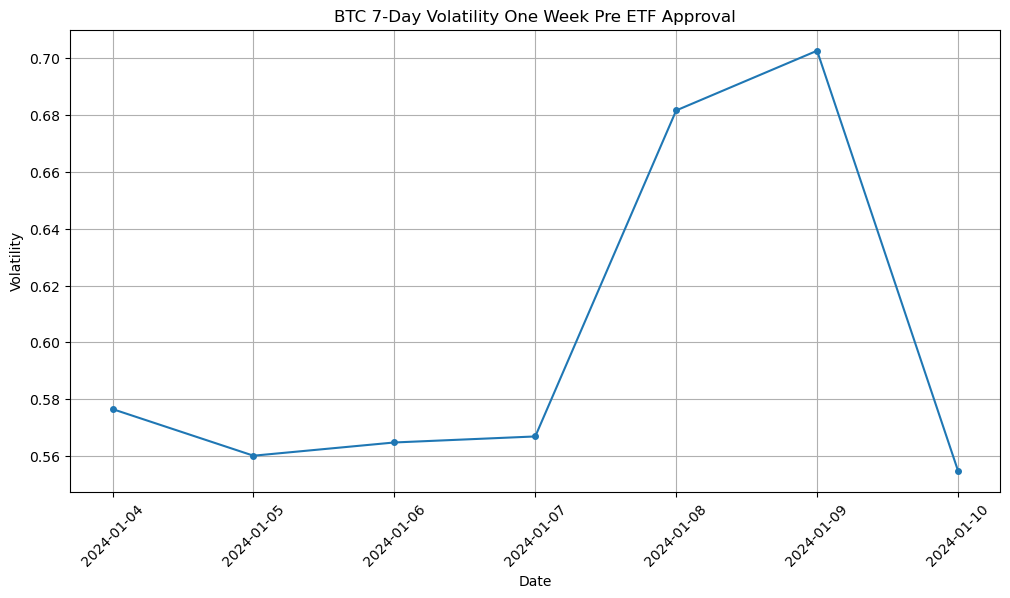

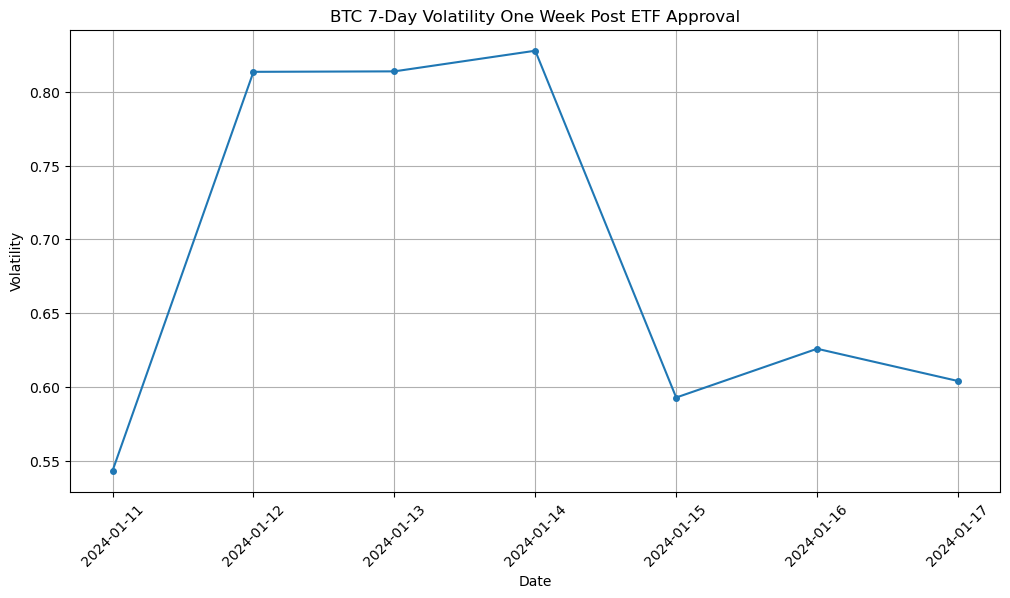

In [12]:
# Plotting 7-Day Volatility time series pre and post ETF approval
plot_time_series(week_pre_etf_df, '7_Day_Volatility', 'BTC 7-Day Volatility One Week Pre ETF Approval', 'Volatility')
plot_time_series(week_post_etf_df, '7_Day_Volatility', 'BTC 7-Day Volatility One Week Post ETF Approval', 'Volatility')
plt.show()

### Insight: Pre-approval we see a steep rise in volatility a few days, however on the day of the announcement we see a steep drop in volatility likely due to an equal amount of buyers and sellers attempting to trade the news of the ETF. This is also supported by volume spiking on the day of the approval vs stagnant price fluctuations. A few days post approval we a see a sharp increase in volatility likely due to a drop in market participation as indicated by the steep drop in volume which was followed by a large amount selling as apparent by the steep reversal in price. Post ETF it seems there were not enough prospective buyers able to balance out price fluctuations as interest decreased.

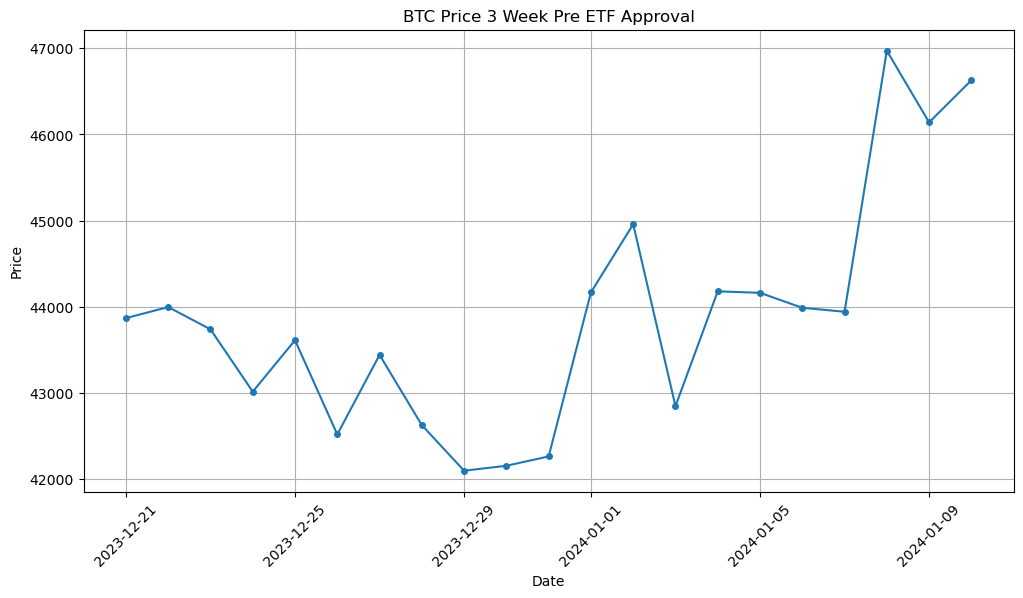

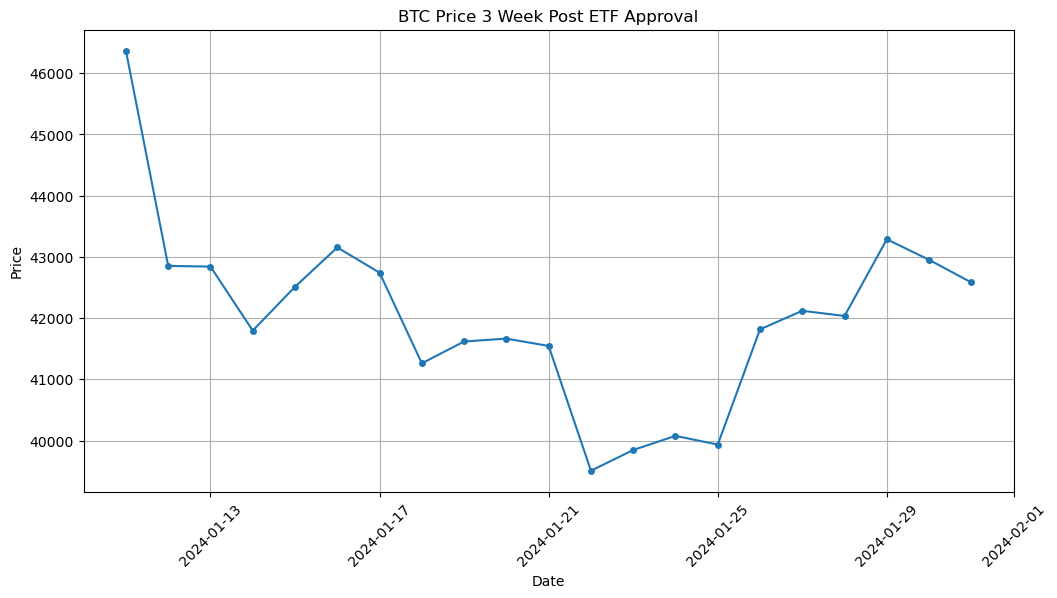

In [13]:
# Plotting Price time series pre and post ETF approval
plot_time_series(three_week_pre_etf_df, 'Adj Close', 'BTC Price 3 Week Pre ETF Approval', 'Price')
plot_time_series(three_week_post_etf_df, 'Adj Close', 'BTC Price 3 Week Post ETF Approval', 'Price')


plt.show()

### Insight: the price of BTC 3 weeks pre and post ETF approval is very similar to the price action the week before and after. An uptrend before followed by a downtrend in price.

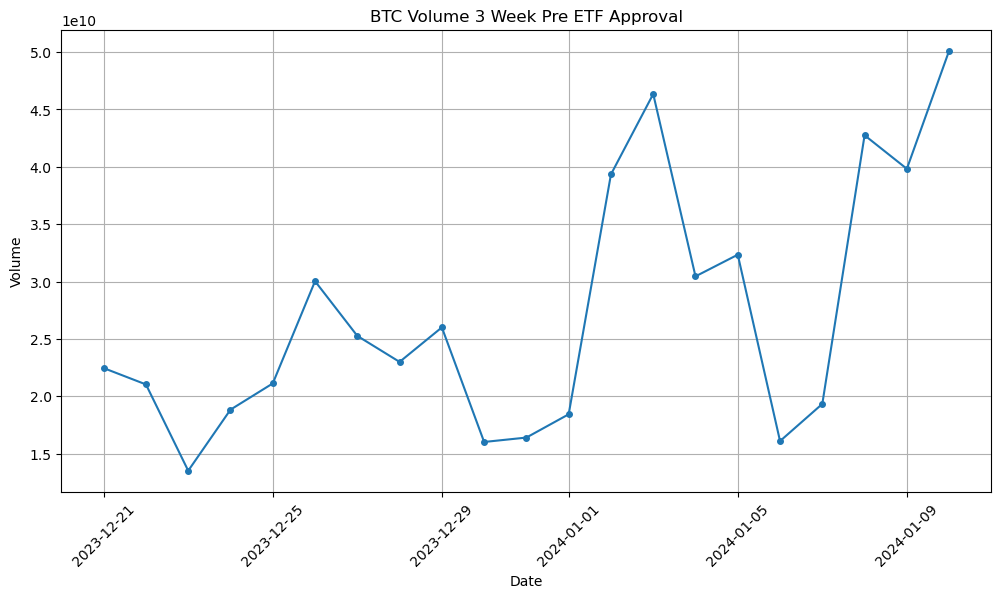

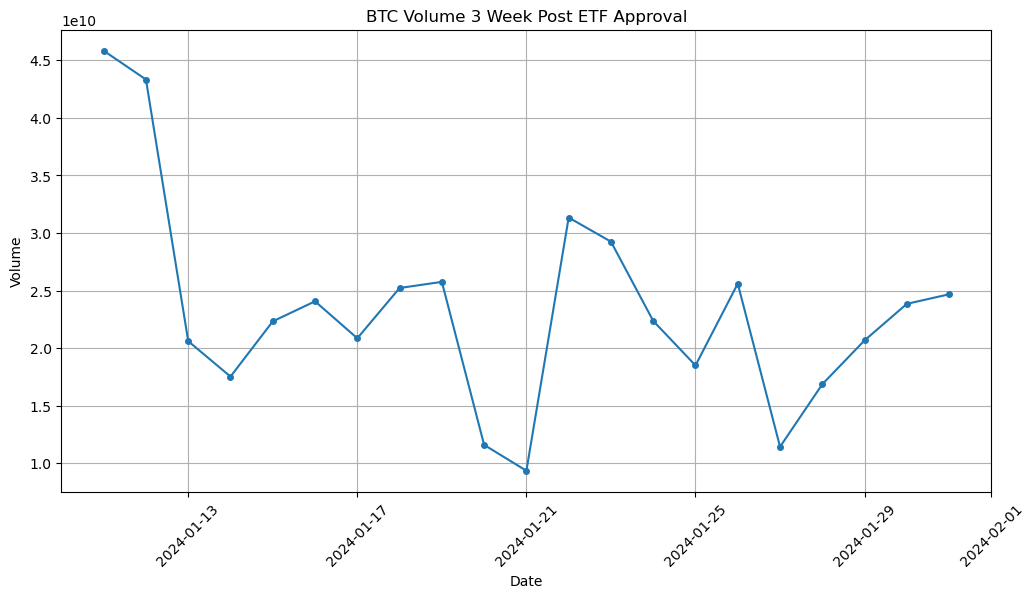

In [14]:
# Plotting Volume time series pre and post ETF approval
plot_time_series(three_week_pre_etf_df, 'Volume', 'BTC Volume 3 Week Pre ETF Approval', 'Volume')
plot_time_series(three_week_post_etf_df, 'Volume', 'BTC Volume 3 Week Post ETF Approval', 'Volume')
plt.show()

### Insight: Volume appeared to be trending upwards 3 weeks before the highly anticipated BTC ETF and followed by a sharp decrease a few days post ETF as the volume eventually plateaued. Indicating a decrease in interest as the BTC ETF news settled. 

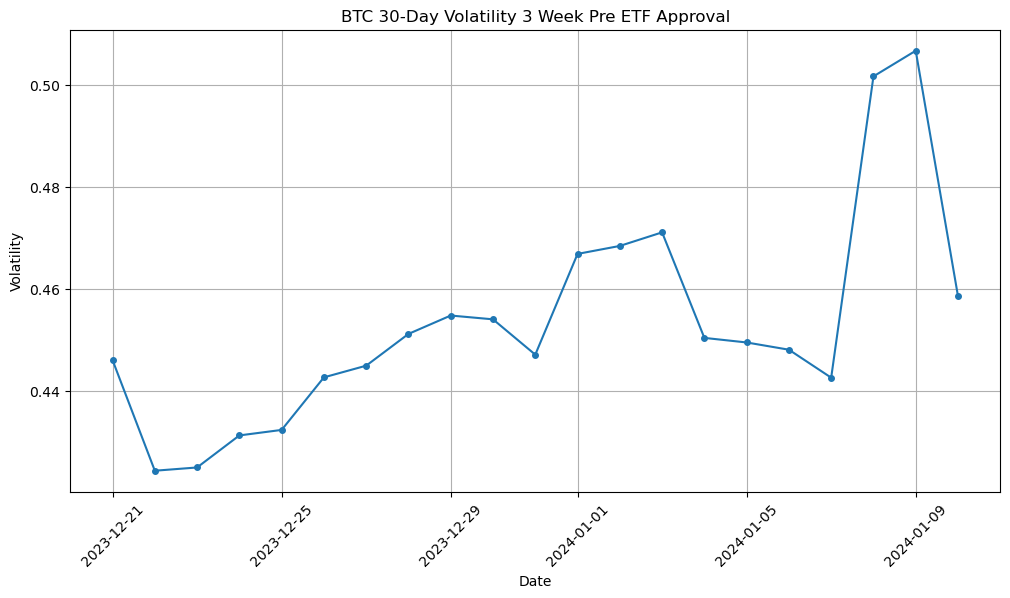

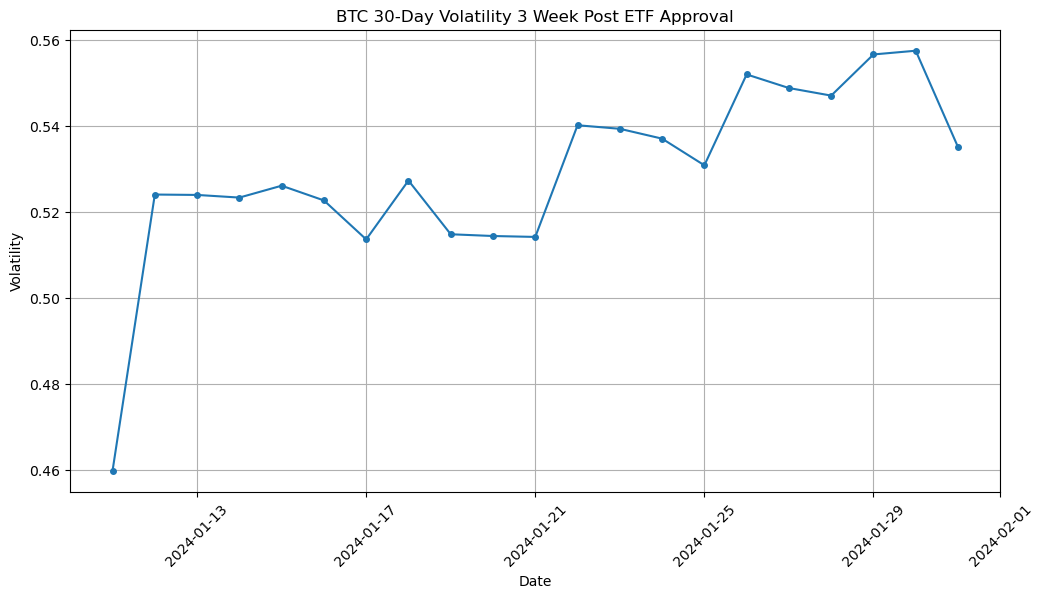

In [15]:
# Plotting 7-Day Volatility time series pre and post ETF approval
plot_time_series(three_week_pre_etf_df, '30_Day_Volatility', 'BTC 30-Day Volatility 3 Week Pre ETF Approval', 'Volatility')
plot_time_series(three_week_post_etf_df, '30_Day_Volatility', 'BTC 30-Day Volatility 3 Week Post ETF Approval', 'Volatility')
plt.show()

### Insight: The 30 day volatility 3 weeks before approval seemed to be steadily increasing, their appeared to be execsive buying indicated by rising price and volume. Similar to the 7 day volatility we see a steep drop in volatility the day of the approval which indicates again that as volume was peaking the were a large yet equal amount of buyers and sellers attempting to trade the news. 30 day volatility sharply picked up a few days post ETF as interest from market participants decreased which is indicated by the subsequent volume decrease. This then allowed a sharp selloff in price which caused the volatility increase. In later weeks post ETF volatility remained fairly high likely due to lack of market participants and thinner order books creating violent swings in price.  

## ETF FLOWS ANALYSIS

In [18]:
#Loading ETF flows data obtained from etf.com

def create_etf_df(file_path):
    df = pd.read_csv(file_path)
    return df

IBIT_df = create_etf_df('/home/dgebnico/documents/IBIT.csv')
GBTC_df = create_etf_df('/home/dgebnico/documents/GBTC.csv')
FBTC_df = create_etf_df('/home/dgebnico/documents/FBTC.csv')
BITO_df = create_etf_df('/home/dgebnico/documents/BITO.csv')
ARKW_df = create_etf_df('/home/dgebnico/documents/ARKW.csv')


In [27]:
# Combine all ETF DataFrames into a single DataFrame with an additional identifier column
IBIT_df['ETF'] = 'IBIT'
GBTC_df['ETF'] = 'GBTC'
FBTC_df['ETF'] = 'FBTC'
BITO_df['ETF'] = 'BITO'
ARKW_df['ETF'] = 'ARKW'

# Concatenate all DataFrames vertically
all_etfs_df = pd.concat([IBIT_df, GBTC_df, FBTC_df, BITO_df, ARKW_df])
all_etfs_no_GBTC = pd.concat([IBIT_df, FBTC_df, BITO_df, ARKW_df])
# Group by Date and sum the Flows for each date
aggregate_flows = all_etfs_df.groupby('Date')['Flows'].sum().reset_index()
all_etfs_without_GBTC_flows = all_etfs_no_GBTC.groupby('Date')['Flows'].sum().reset_index()
# This is your aggregate DataFrame with summed flows
aggregate_df = aggregate_flows
all_etfs_without_GBTC = all_etfs_without_GBTC_flows
# If you want to ensure the Date column is in datetime format (optional but recommended)
aggregate_df['Date'] = pd.to_datetime(aggregate_df['Date'])

sum = aggregate_df['Flows'].sum()
sum_no_GBTC = all_etfs_without_GBTC['Flows'].sum()

print(aggregate_df)
print(all_etfs_without_GBTC)
print(f"Net flows in past month:{sum}")
print(f"Net flows in past month without Grayscale BTC ETF:{sum_no_GBTC}")

        Date    Flows
0 2024-01-08   62.357
1 2024-01-15 -127.004
2 2024-01-22 -962.286
3 2024-01-29  400.426
4 2024-02-05   40.159
         Date     Flows
0  01/08/2024    62.357
1  01/15/2024  1994.406
2  01/22/2024  1607.204
3  01/29/2024  1437.546
4  02/05/2024   184.776
Net flows in past month:-586.3479999999995
Net flows in past month without Grayscale BTC ETF:5286.289


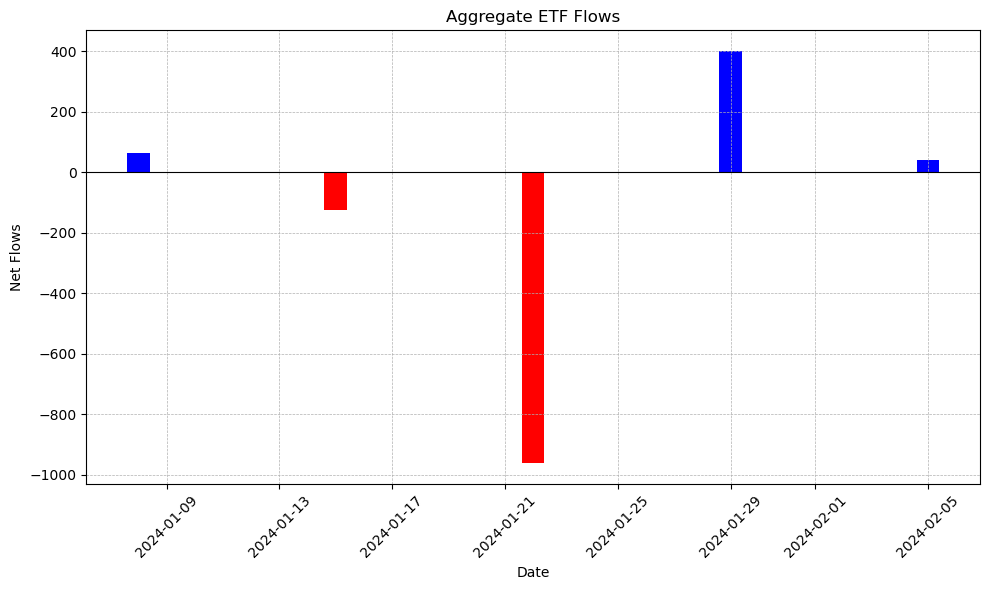

In [21]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(aggregate_df['Date'], aggregate_df['Flows'], color=aggregate_df['Flows'].map(lambda x: 'blue' if x >= 0 else 'red'))

# Formatting the plot
plt.axhline(0, color='black', linewidth=0.8)  # Adds a horizontal line at zero to clearly show positive and negative areas
plt.xlabel('Date')
plt.ylabel('Net Flows')
plt.title('Aggregate ETF Flows')
plt.xticks(rotation=45)  # Rotate dates for better readability

# Show grid
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Display the plot
plt.tight_layout()  # Adjusts subplot params so that the subplot(s) fits in to the figure area
plt.show()

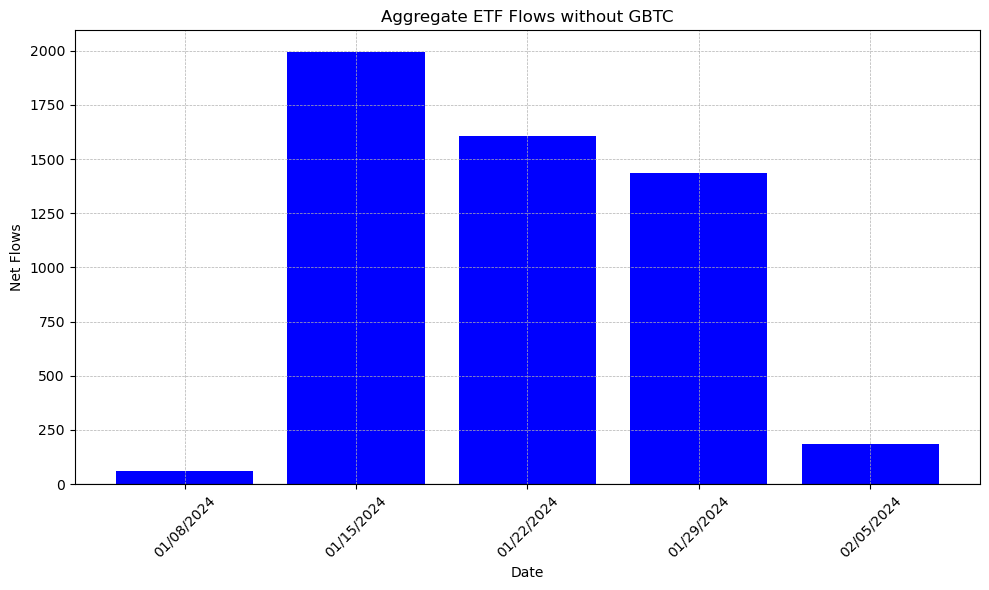

In [28]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(all_etfs_without_GBTC['Date'], all_etfs_without_GBTC['Flows'], color=all_etfs_without_GBTC['Flows'].map(lambda x: 'blue' if x >= 0 else 'red'))

# Formatting the plot
plt.axhline(0, color='black', linewidth=0.8)  # Adds a horizontal line at zero to clearly show positive and negative areas
plt.xlabel('Date')
plt.ylabel('Net Flows')
plt.title('Aggregate ETF Flows without GBTC')
plt.xticks(rotation=45)  # Rotate dates for better readability

# Show grid
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Display the plot
plt.tight_layout()  # Adjusts subplot params so that the subplot(s) fits in to the figure area
plt.show()

### Insight: The graph above represent aggregate ETF flows from the TOP 5 ETFs with the most assets under management, one of them being the famous Blackrock ETF. Here we can see a net negative outflow of -586.3479999999995 million due to excessive selling from the Grayscale BTC ETF. This is also supported by the overall decrease in price since ETF approval. However, if you look at the ETF flows without the Grayscale ETF we see a complete different picture with a net postive 5286.289 million in flows.

## Conclusion

### The BTC ETF approval was a highly anticipated event by many market investors and institutions who have  been eagerly waiting for a regulated BTC trading instrument. The price, volume and 30 day volatility all increased steadily 3 weeks before the ETF as more and more market participants were buying into BTC before the grand announcement. However, price and volume sharply reversed post BTC ETF approval indicating exhaustion of buyers whereas 30 day volatility remained very high likely due to the massive outflows from the GrayScale BTC ETF which had caused the massive selloff in BTC price. As the news of the ETF approval settled and market participants noticed that the approval didnt cause massive inflows like many expected the interest of markets participants descreased in the short term. However, if not for the execive Grayscale selloff, net flows would be highly positive as indicated by our analysis of ETF flows without Grayscale. This could indicate that once the Grayscale ETF selling stops the net ETF inflows may become positive which would be reflected in the BTC price in the longterm which would bring back insrease